imports

In [227]:
import geopandas as gpd
import shapely
import seaborn
import math
import matplotlib.pyplot as plt
import libpysal as ps

read geojson file

In [228]:
gdf = gpd.read_file("../example_dataset.geojson")


get count of field which are not sowed in April

In [229]:
# sowing_date_list = gdf["sowing_date"].tolist()
# count = 0
# for item in sowing_date_list:
#     if (item[4:8] != '-04-'):
#         count += 1
# print(f"Count of filed which are not sowed in April {count}")

mask = (gdf["sowing_date"].str[4:8] != "-04-") # get mask where field with sowing date April are false
not_april_fields = gdf[mask] # convert mask into array
print(F"\n| Count of fields which are not sowed in April: {len(not_april_fields)} |") # get count of fields which are not sowed in April
print(f"\n\nFields:\n", not_april_fields) # output these fields


| Count of fields which are not sowed in April: 421 |


Fields:
     crop_name sowing_date  actual_yield       field_id  avg_temperature  \
143      maiz  2016-05-02        6300.0  GS_CK_04_1002        11.910536   
144      maiz  2016-05-02        6500.0  GS_CK_04_1001        11.910536   
145      maiz  2016-05-03        6800.0  GS_CK_04_1400        11.884685   
146      maiz  2016-05-03        6400.0  GS_CK_04_1003        11.884685   
147      maiz  2016-05-05       10400.0  MS_VN_02_1002        11.332681   
..        ...         ...           ...            ...              ...   
995       sun  2016-03-17        3500.0   MS_VN_05_404        12.320602   
996       sun  2016-03-18        2800.0   MS_VN_05_403        12.320602   
997       sun  2016-03-19        2700.0   MS_VN_05_401        12.320602   
998       sun  2016-03-30        1800.0   PA_KM_05_410        12.204410   
999       sun  2016-03-30        2400.0   MS_VN_05_311        12.319826   

     avg_rainfall  model_yield  \

set relative error for each yield

In [230]:
# error = gdf['actual_yield'] - gdf['model_yield']
# i = 0
# while i < len(error):
#     error[i] = math.fabs(error[i])
#     i+=1
# print(error.tolist())
error = [math.fabs(a - b) for a, b in zip(gdf['actual_yield'], gdf['model_yield'])] # a shorten view of the commented code aboove. It gets the difference between actual_yield and model_yield
gdf['relative_error'] = (error/gdf['actual_yield']) * 100 # gets relative error (відносну похибку) between actual_yield and model_yield
print(gdf['relative_error']) # get the 'relative_error' column for each yield

0      17.144737
1      11.569620
2       5.278481
3       1.355556
4      25.652893
         ...    
995    13.400000
996     8.250000
997    12.259259
998    85.555556
999    26.833333
Name: relative_error, Length: 1000, dtype: float64


get yields with min and max relative error columns

In [231]:
print("| Yield with maximum relative error |\n", gdf.loc[gdf['relative_error'].idxmax()])
print("\n| Yield with minimum relative error |\n", gdf.loc[gdf['relative_error'].idxmin()])

| Yield with maximum relative error |
 crop_name                                                       maiz
sowing_date                                               2017-04-28
actual_yield                                                  1500.0
field_id                                                KI_VN_08_405
avg_temperature                                            11.707561
avg_rainfall                                              641.750403
model_yield                                                   6262.0
geometry           MULTIPOLYGON (((29.395252000008373 48.23347100...
relative_error                                            317.466667
Name: 213, dtype: object

| Yield with minimum relative error |
 crop_name                                                        soy
sowing_date                                               2018-05-09
actual_yield                                                  2600.0
field_id                                               KI_VN_10_0702

set 'centroid' column to the dataset

In [232]:
try:
    gdf['centroid'] = gdf.centroid
    print("'centroid' has been added to the dataset successfully")
except:
    print("Error adding 'centroid' column to the dataset")

'centroid' has been added to the dataset successfully


C:\Users\38096\AppData\Local\Temp\ipykernel_13056\1944118753.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


set 'area' column to the dataset

In [233]:
try:
    gdf['area'] = gdf.area    
    print("'area' columns has been added to the dataset successfully")
except:
    print("Error adding 'area' column to the dataset")
    


'area' columns has been added to the dataset successfully


C:\Users\38096\AppData\Local\Temp\ipykernel_13056\3942838167.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.area


<Axes: >

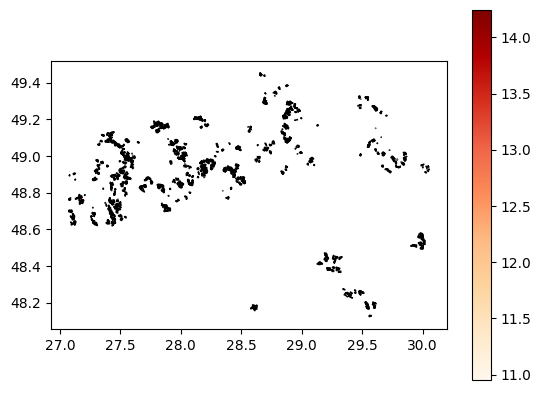

In [234]:
gdf.plot(column='avg_temperature', cmap='OrRd', edgecolor='k', legend=True)

<Axes: >

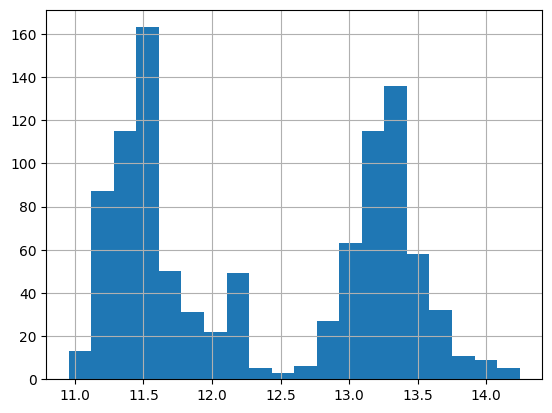

In [235]:
gdf['avg_temperature'].hist(bins=20)

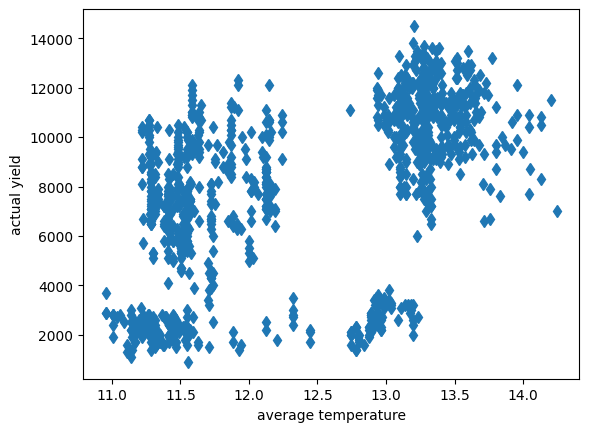

In [236]:
plt.plot(gdf['avg_temperature'], gdf['actual_yield'], 'd') # create graph gue to the plot
plt.xlabel("average temperature") # name x axis
plt.ylabel("actual yield") # name y axis
plt.savefig("yield_vs_temperature.png")
plt.show() # output graph

pic is saved


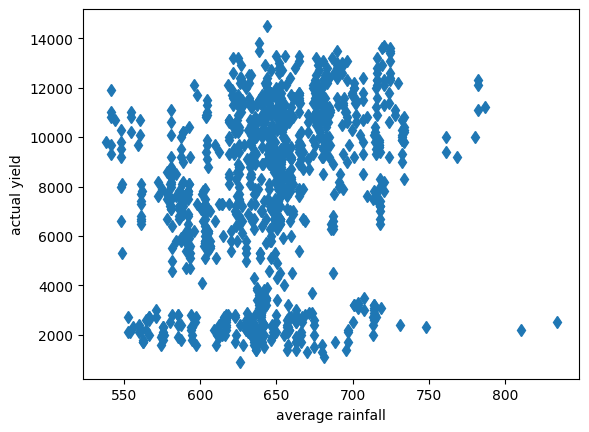

In [237]:
plt.plot(gdf['avg_rainfall'], gdf['actual_yield'], 'd')
plt.xlabel("average rainfall") # name x axis
plt.ylabel("actual yield") # name y axis
plt.savefig("yield_vs_rainfall.png")
print("pic is saved")
plt.show() # output graph

In [242]:
gdf.to_file("updated_dataset.geojson", driver='GeoJSON')

Index(['crop_name', 'sowing_date', 'actual_yield', 'field_id',
       'avg_temperature', 'avg_rainfall', 'model_yield', 'geometry',
       'relative_error', 'centroid', 'area'],
      dtype='object')


TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x0000021B7F9522F0>' as a data type